- SOURCES
- Main Website:
- https://mydramalist.com

- Specific Domain:
- https://mydramalist.com/search?adv=titles&ty=68&co=3&re=2015,2023&rt=1,10&st=3&so=newest&or=asc&page=1

- COLLECTION METHODOLOGY
- Web crawling/scraping using Python (BeautifulSoup). Extract the html content using BeautifulSoup library. Transform the data - into appropriate format. Load the data into pandas dataframe and download them as .csv file.

In [5]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [6]:
drama_in_rank_df = pd.read_excel("../data/drama_df_in_rank_2023-09-14_ver_7.xlsx")
recommendations_df = pd.read_csv("../data/recommendations.csv")
reviews_df = pd.read_csv("../data/reviews.csv")
unique_network_df = pd.read_csv("../data/unique_network.csv")
wiki_actors_df = pd.read_csv("../data/wiki_actors.csv")

korean_drama_df = pd.read_csv("../data/korean_drama.csv")
# final_drama_df = pd.read_excel("../data/final_drama.xlsx")

# visualization

- [ Number of Produced Kdrama per Year ]
- [ Synopsis - WordCloud]
- 추천.csv 파일로 NLP 분류 모델 추천시스템 만들어보자

- [ Top 10 Kdramas with the ??? score ]

In [7]:
recommendations_df

,kdrama_name,recommendations
0,Mask Girl,"['Sympathy for Lady Vengeance', 'True Beauty',..."
1,Sing My Crush,"['About Youth', 'Wish You: Your Melody From My..."
2,D.P. Season 2,"['Designated Survivor: 60 Days', 'D.P.', 'Weak..."
3,Not Others,"[""You're All Surrounded"", 'Hometown Cha-Cha-Ch..."
4,Shadow Detective Season 2,"['WATCHER', 'Stranger', 'Stranger Season 2', '..."
...,...,...
1748,My Heart Twinkle Twinkle,"['You Are My Sunshine', 'Too Late to Say I Lov..."
1749,Heart to Heart,"[""It's Okay, That's Love"", 'Me too, Flower!', ..."
1750,"Persevere, Goo Hae Ra","['Imitation', 'Monstar', ""You're Beautiful"", '..."
1751,Spy,"['Healer', '7th Grade Civil Servant', 'Invinci..."


# Kdramas about the review score

-평가 항목별 평균 (Average Scores):

-각 평가 항목에 대한 평균 점수를 막대 그래프로 나타내어 어떤 항목이 가장 높거나 낮은지 확인할 수 있습니다.

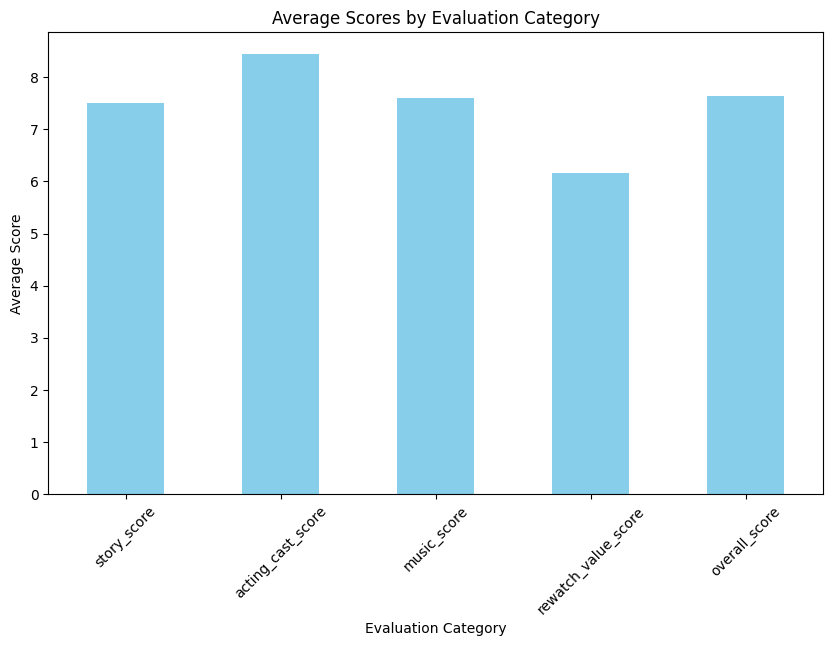

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 주어진 데이터 프레임에서 필요한 열만 선택합니다.
selected_columns = ['story_score', 'acting_cast_score', 'music_score', 'rewatch_value_score', 'overall_score']
subset_df = reviews_df[selected_columns]

# 각 평가 항목별 평균 계산
average_scores = subset_df.mean()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar', color='skyblue')
plt.title("Average Scores by Evaluation Category")
plt.xlabel("Evaluation Category")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

- 평가 항목 간 상관관계 (Correlation Heatmap):

- 각 평가 항목 간의 상관 관계를 확인하는 히트맵을 그려서 어떤 항목들이 서로 관련이 있는지 시각적으로 파악할 수 있습니다.

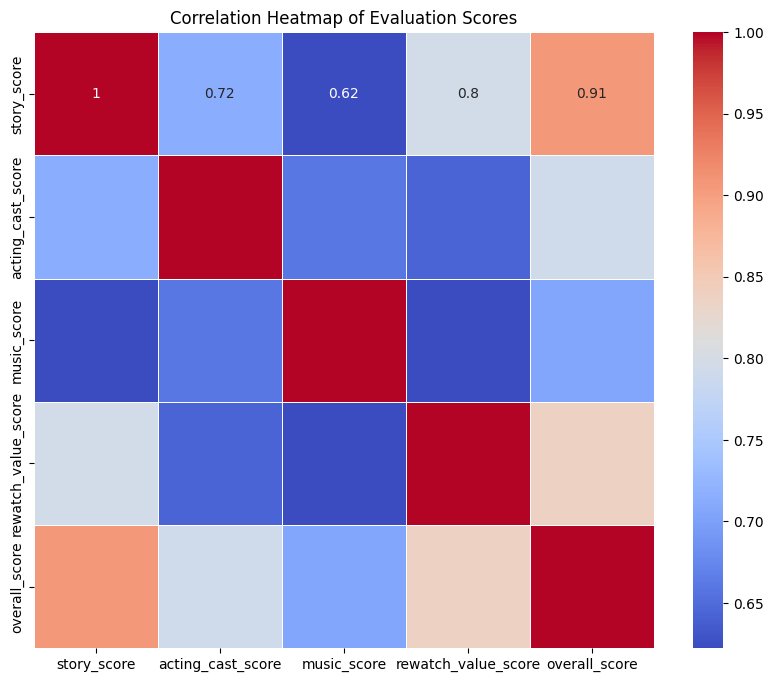

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 주어진 데이터 프레임에서 필요한 열만 선택합니다.
selected_columns = ['story_score', 'acting_cast_score', 'music_score', 'rewatch_value_score', 'overall_score']
subset_df = reviews_df[selected_columns]

# 상관관계 계산
correlation_matrix = subset_df.corr()

# Correlation Heatmap 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Evaluation Scores")
plt.show()


- 히스토그램 (Histogram):

- story_score, acting_cast_score, music_score, rewatch_value_score, overall_score 등 각 평가 항목의 점수 분포를 확인하는 히스토그램을 그릴 수 있습니다.

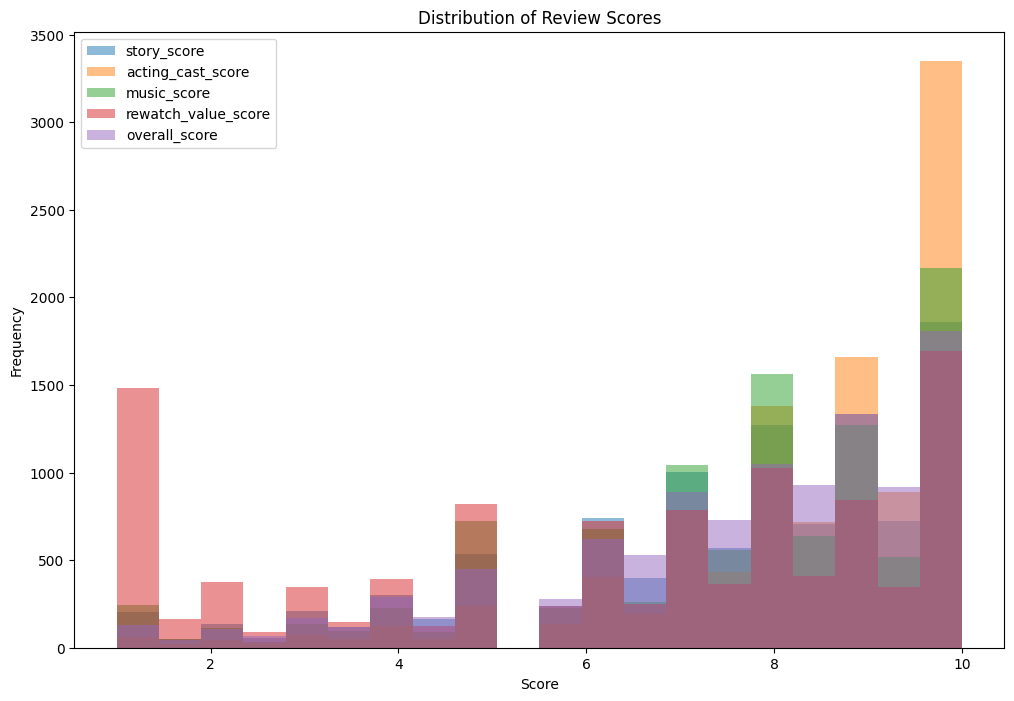

In [10]:
import matplotlib.pyplot as plt

# 히스토그램을 그리기 위한 열 선택
scores = ['story_score', 'acting_cast_score', 'music_score', 'rewatch_value_score', 'overall_score']

# 각 점수 항목에 대한 히스토그램 그리기
plt.figure(figsize=(12, 8))
for score in scores:
    plt.hist(reviews_df[score], bins=20, alpha=0.5, label=score)

# 플롯 제목, 레이블, 범례 추가
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

# 플롯 표시
plt.show()


In [11]:
reviews_df

,user_id,title,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
0,c8ffdab3f2a338eeb54b265598dbbb55,Sing My Crush,9.0,9.0,10.0,9.0,9.0,the Best Song from my Crush This will now ran...,8 of 8 episodes seen,23
1,c8ffdab3f2a338eeb54b265598dbbb55,Happy Merry Ending,5.0,7.0,9.0,4.0,6.5,I'm Happy and Merry That it Ended Quickly The ...,8 of 8 episodes seen,31
2,c8ffdab3f2a338eeb54b265598dbbb55,Duty After School: Part 2,4.0,9.0,3.0,1.0,4.0,This PART 2 Should Never Have Happened If you...,4 of 4 episodes seen,121
3,c8ffdab3f2a338eeb54b265598dbbb55,Our Dating Sim,9.0,9.5,9.0,9.0,9.0,I want to play this dating sim! I want to pla...,8 of 8 episodes seen,79
4,c8ffdab3f2a338eeb54b265598dbbb55,The Director Who Buys Me Dinner,7.5,8.5,7.0,6.0,7.0,"Half-Cooked, Dont Eat A hard pass, unless som...",10 of 10 episodes seen,66
...,...,...,...,...,...,...,...,...,...,...
10620,33bb7ae6e00a345c927f1b8e39594908,Heart to Heart,8.0,9.0,7.0,9.0,9.0,it was a really good drama. highly recommended...,16 of 16 episodes seen,3
10621,e5d4bbe315b03eb4878aa84d2f4fcff0,"Kill Me, Heal Me",8.5,10.0,10.0,10.0,9.5,The only flaws I found in this drama were the ...,20 of 20 episodes seen,40
10622,43aaace8631f36eda17a1880c7329a82,"Kill Me, Heal Me",5.5,7.5,7.5,5.5,5.5,If you're looking for a well written drama abo...,20 of 20 episodes seen,29
10623,172b38a4599f3a649fe192fb967ce084,"Kill Me, Heal Me",9.0,10.0,10.0,8.0,9.5,"I started watching this drama, because of the ...",20 of 20 episodes seen,23


#  [Number of Produced Kdrama per Year]

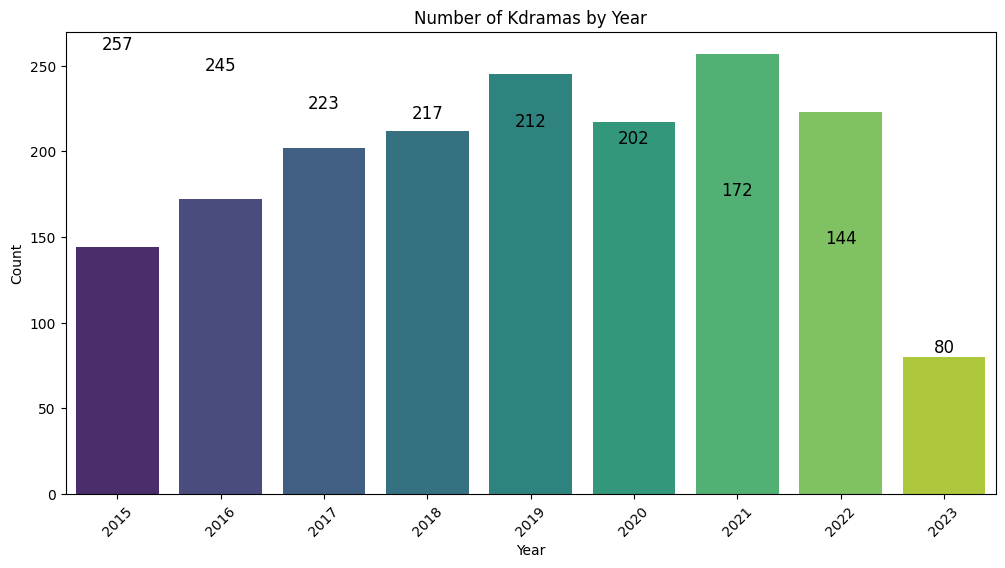

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# "content_rt" 열에서 연령 등급만 추출하여 새로운 열을 만듭니다.
korean_drama_df['Age Rating'] = korean_drama_df['content_rt'].str.extract(r'(\d+\+? - Teens \d+ or older|\d+\+? - Teens \d+ or older|Not Yet Rated)')[0]

# 연도별로 Kdrama 수량을 계산합니다.
yearly_drama_counts = korean_drama_df['year'].value_counts().reset_index()
yearly_drama_counts.columns = ['Year', 'Count']

# 바 그래프를 그립니다.
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=yearly_drama_counts, x='Year', y='Count', palette='viridis')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Kdramas by Year")
plt.xticks(rotation=45)  # x축 레이블 회전

# 막대 위에 숫자를 표시합니다.
for index, row in yearly_drama_counts.iterrows():
    ax.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=12)

plt.show()

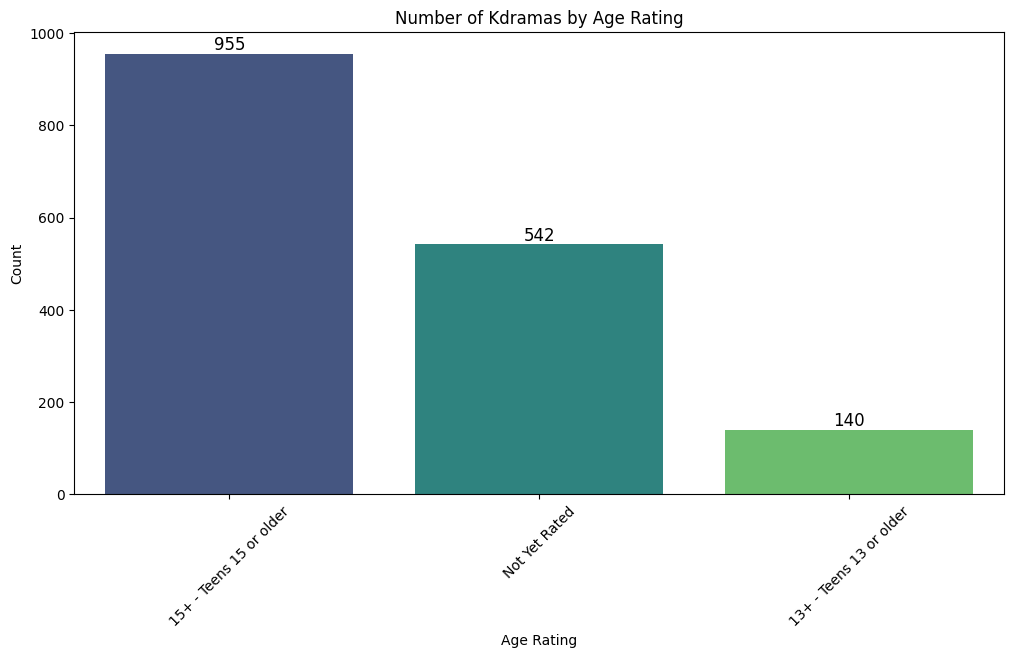

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# "content_rt" 열에서 연령 등급만 추출하여 새로운 열을 만듭니다.
korean_drama_df['Age Rating'] = korean_drama_df['content_rt'].str.extract(r'(\d+\+? - Teens \d+ or older|\d+\+? - Teens \d+ or older|Not Yet Rated)')[0]

# 연령 등급별 드라마 수량을 계산합니다.
age_rating_counts = korean_drama_df['Age Rating'].value_counts().reset_index()
age_rating_counts.columns = ['Age Rating', 'Count']

# 바 그래프를 그립니다.
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=age_rating_counts, x='Age Rating', y='Count', palette='viridis')
plt.xlabel("Age Rating")
plt.ylabel("Count")
plt.title("Number of Kdramas by Age Rating")
plt.xticks(rotation=45)  # x축 레이블 회전

# 막대 위에 숫자를 표시합니다.
for index, row in age_rating_counts.iterrows():
    ax.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=12)

plt.show()


# [WordCloud]

In [14]:
korean_drama_df['director']

0                        ['So Joon Moon']
1                                     NaN
2                        ['Han Dong Hwa']
3                                     NaN
4                        ['Kim Chul Gyu']
                      ...                
1747       ['Kim Jin Man', 'Kim Dae Jin']
1748                  ['Park Kyung Ryul']
1749    ['Jang Joon Ho', 'Oh Hyun Chang']
1750                     ['Joo Dong Min']
1751                                  NaN
Name: director, Length: 1752, dtype: object

In [15]:
korean_drama_df.columns

Index(['kdrama_id', 'drama_name', 'year', 'director', 'screenwriter',
       'country', 'type', 'tot_eps', 'duration', 'start_dt', 'end_dt',
       'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop',
       'Age Rating'],
      dtype='object')

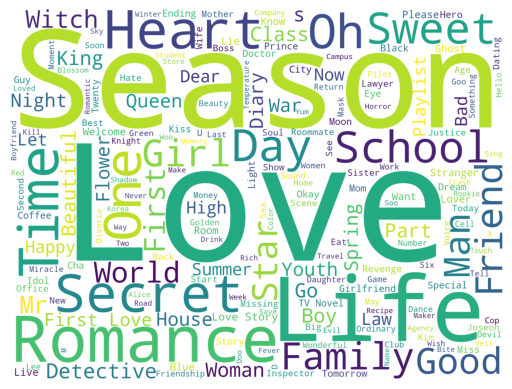

In [18]:
# drama_name - WordCloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

words = ' '.join(korean_drama_df['drama_name'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=2000, height=1500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

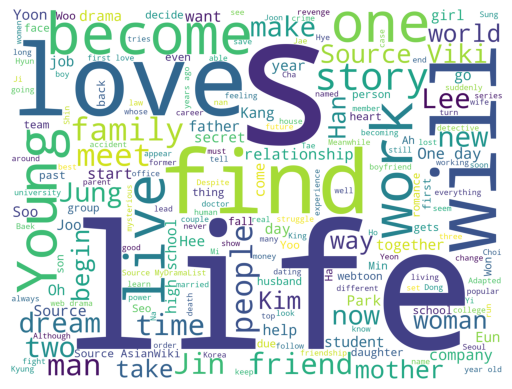

In [19]:
# Synopsis - WordCloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

words = ' '.join(korean_drama_df['synopsis'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=2000, height=1500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

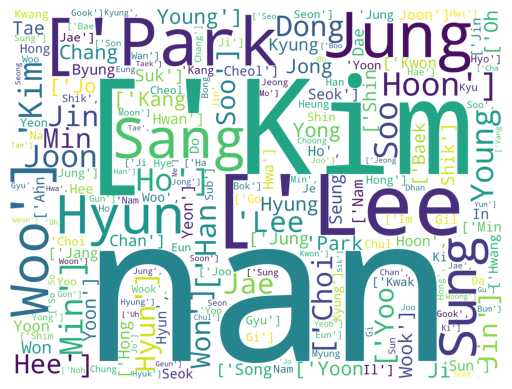

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 단어 빈도 계산
words = ' '.join(korean_drama_df['director'].astype(str))
word_list = [word for word in words.split() if not word.startswith('@')]
word_freq = {}
for word in word_list:
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

# 빈도순으로 정렬된 단어 목록 생성
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
sorted_words = [(word, freq) for word, freq in sorted_words]

# WordCloud 생성
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS,
                      width=2000, height=1500).generate_from_frequencies(dict(sorted_words))

# 그래프 출력
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# 영화 추천 시스템

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\whghd\AppData\Roaming\nltk_data...


True

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 파일 불러오기
reviews_df = pd.read_csv("../data/reviews.csv")
reviews_df['review_text'].fillna('', inplace=True)

# VADER 감정 분석기 초기화
analyzer = SentimentIntensityAnalyzer()

def sentiment_label(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# 여기에서 reviews_df를 적절히 설정해야 합니다.
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews_df['review_text'])

# 코사인 유사도 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 추천 함수 정의
def get_recommendations(user_input, num_recommendations=5, similarity_threshold=0.1):
    # 사용자 입력에 대한 TF-IDF 벡터 생성
    user_input_tfidf = tfidf_vectorizer.transform([user_input])

    # 코사인 유사도 계산
    cosine_sim_user = linear_kernel(user_input_tfidf, tfidf_matrix)

    # 유사한 드라마 인덱스 찾기
    similar_indices = cosine_sim_user[0].argsort()[:-num_recommendations-1:-1]

    # 추천 드라마 정보 초기화
    recommended_movies = []

    # 추천 드라마 정보 채우기
    for idx in similar_indices:
        similarity_score = cosine_sim_user[0][idx]

        # 유사도 점수가 기준보다 큰 경우에만 추가
        if similarity_score >= similarity_threshold:
            title = reviews_df['title'].iloc[idx]
            overall_score = reviews_df['overall_score'].iloc[idx]

            # Sentiment 분석
            review_text = reviews_df['review_text'].iloc[idx]
            sentiment = sentiment_label(review_text)

            recommended_movies.append({
                'title': title,
                'overall_score': overall_score,
                'Sentiment': sentiment,
                'review_text': review_text  # review_text 정보 추가
            })

    return recommended_movies